<a href="https://colab.research.google.com/github/Aditya100300/Classification-of-COVID-19-chest-X-ray-images/blob/master/covid_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


Using TensorFlow backend.


In [64]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!git clone https://github.com/vaibhavG321/Classification-of-COVID-19-chest-X-ray-images

Cloning into 'Classification-of-COVID-19-chest-X-ray-images'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 320 (delta 0), reused 0 (delta 0), pack-reused 319
Receiving objects: 100% (320/320), 80.62 MiB | 12.79 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [3]:
!ls

Classification-of-COVID-19-chest-X-ray-images  sample_data


In [5]:
cd Classification-of-COVID-19-chest-X-ray-images 

/content/Classification-of-COVID-19-chest-X-ray-images


In [6]:
!ls

aditi-godbole-model.py	aditya-babar-model.py	 dataset    vaibhav-model.py
aditi-verma-model.py	aditya-gurnani-model.py  README.md


In [7]:
cd dataset

/content/Classification-of-COVID-19-chest-X-ray-images/dataset


In [8]:
!ls

evaluation  testing  training


In [9]:
cd training

/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training


In [10]:
!ls

infected  normal


In [0]:
train_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal'
train_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected'
test_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal'
test_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected'
evaluate_normal_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/normal'
evaluate_infected_path='/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/infected'

In [14]:
print('train_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal')))
print('train_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/infected')))
print('test_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/normal')))
print('test_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/testing/infected')))
print('evaluate_normal cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/normal')))
print('evaluate_infected cases ',len(os.listdir('/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/infected')))

train_normal cases  97
train_infected cases  90
test_normal cases  69
test_infected cases  25
evaluate_normal cases  1
evaluate_infected cases  1


In [0]:
IMAGE_SIZE = (224,224)
DIR_NAME = '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/'
IMAGE_DIR = DIR_NAME + 'normal/'
imagePaths=[]
for dirname, _, filenames in os.walk(DIR_NAME):
    for filename in filenames:
      imagePaths.append(os.path.join(dirname, filename))

In [44]:
imagePaths

['/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/normal/1.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/evaluation/infected/1.jpg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0135-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0012-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0117-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0353-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0278-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0319-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-images/dataset/training/normal/NORMAL2-IM-0289-0001.jpeg',
 '/content/Classification-of-COVID-19-chest-X-ray-im

In [0]:
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]
	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	# update the data and labels lists, respectively
	data.append(image)
	labels.append(label)
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

In [71]:
data.shape

(283, 224, 224, 3)

In [60]:
labels


array(['normal', 'infected', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'no

In [0]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)
# initialize the training data augmentation object
trainAug = ImageDataGenerator(shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,	rotation_range=15,
	fill_mode="nearest")

In [100]:
trainAug

In [92]:
trainX.shape,testX.shape,trainY.shape,testY.shape

((226, 224, 224, 3), (57, 224, 224, 3), (226, 2), (57, 2))

USING VGG16 MODEL

In [0]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [0]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)


In [66]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
28/28 [==============================] - 133s 5s/step - loss: 0.6245 - accuracy: 0.6284 - val_loss: 0.5377 - val_accuracy: 0.8070
Epoch 2/25
28/28 [==============================] - 133s 5s/step - loss: 0.4896 - accuracy: 0.7752 - val_loss: 0.4763 - val_accuracy: 0.8246
Epoch 3/25
28/28 [==============================] - 137s 5s/step - loss: 0.4031 - accuracy: 0.8578 - val_loss: 0.4095 - val_accuracy: 0.8246
Epoch 4/25
28/28 [==============================] - 134s 5s/step - loss: 0.3666 - accuracy: 0.8578 - val_loss: 0.3809 - val_accuracy: 0.7895
Epoch 5/25
28/28 [==============================] - 134s 5s/step - loss: 0.3368 - accuracy: 0.8853 - val_loss: 0.3791 - val_accuracy: 0.7544
Epoch 6/25
28/28 [==============================] - 134s 5s/step - loss: 0.2538 - accuracy: 0.8945 - val_loss: 0.3169 - val_accuracy: 0.9123
Epoch 7/25
28/28 [==============================] - 136s 5s/step - loss: 0.2579 - accuracy: 0.8945 - val

In [67]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.91      0.87      0.89        23
      normal       0.91      0.94      0.93        34

    accuracy                           0.91        57
   macro avg       0.91      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57



In [68]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


[[20  3]
 [ 2 32]]
acc: 0.9123
sensitivity: 0.8696
specificity: 0.9412


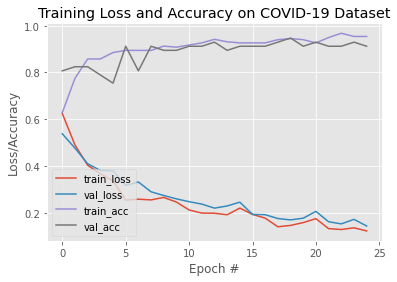

In [69]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [72]:
predIdxs

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1])

In [94]:
#from IPython.display import Image
#Image('/content/drive/My Drive/covid dataset/images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg')
image = cv2.imread('/content/drive/My Drive/covid dataset/images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
img=np.reshape(image,(1,224,224,3))
model.predict(img)

array([[2.8182299e-07, 9.9999976e-01]], dtype=float32)

In [98]:
img.shape

(1, 224, 224, 3)

END OF VGG16


WITHOUT PRETRAINED MODEL

In [0]:
model = Sequential()
model.add(Conv2D(80, (3, 3),activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(32, (3, 3),activation='relu'))


model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

In [0]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [104]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
28/28 [==============================] - 30s 1s/step - loss: 1.1116 - accuracy: 0.4587 - val_loss: 0.6921 - val_accuracy: 0.5965
Epoch 2/25
28/28 [==============================] - 29s 1s/step - loss: 0.6915 - accuracy: 0.5872 - val_loss: 0.6899 - val_accuracy: 0.5965
Epoch 3/25
28/28 [==============================] - 29s 1s/step - loss: 0.6901 - accuracy: 0.5734 - val_loss: 0.6875 - val_accuracy: 0.5965
Epoch 4/25
28/28 [==============================] - 29s 1s/step - loss: 0.6876 - accuracy: 0.5872 - val_loss: 0.6857 - val_accuracy: 0.5965
Epoch 5/25
28/28 [==============================] - 33s 1s/step - loss: 0.6848 - accuracy: 0.5963 - val_loss: 0.6829 - val_accuracy: 0.5965
Epoch 6/25
28/28 [==============================] - 29s 1s/step - loss: 0.6823 - accuracy: 0.5872 - val_loss: 0.6817 - val_accuracy: 0.5965
Epoch 7/25
28/28 [==============================] - 29s 1s/step - loss: 0.6830 - accuracy: 0.5826 - val_loss: 

In [105]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.00      0.00      0.00        23
      normal       0.60      1.00      0.75        34

    accuracy                           0.60        57
   macro avg       0.30      0.50      0.37        57
weighted avg       0.36      0.60      0.45        57



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [107]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[ 0 23]
 [ 0 34]]
acc: 0.5965
sensitivity: 0.0000
specificity: 1.0000


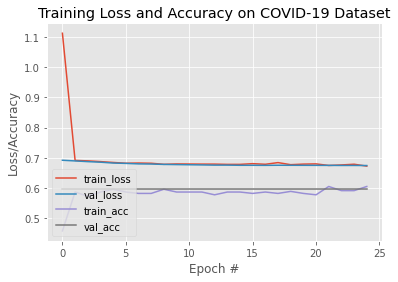

In [108]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [109]:
#from IPython.display import Image
#Image('/content/drive/My Drive/covid dataset/images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg')
image = cv2.imread('/content/drive/My Drive/covid dataset/images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
img=np.reshape(image,(1,224,224,3))
model.predict(img)

array([[0.41502312, 0.58497685]], dtype=float32)

END OF WITHOUT PRETRAINED MODEL

USING INCEPTION-V3 MODEL

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,InceptionV3
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [0]:
baseModel = InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
#construct the head of the model that will be placed on top of the
#the base model

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model= Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

In [0]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [116]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
28/28 [==============================] - 32s 1s/step - loss: 0.6292 - accuracy: 0.8073 - val_loss: 0.0915 - val_accuracy: 0.9649
Epoch 2/25
28/28 [==============================] - 35s 1s/step - loss: 0.5949 - accuracy: 0.8440 - val_loss: 0.0943 - val_accuracy: 0.9649
Epoch 3/25
28/28 [==============================] - 31s 1s/step - loss: 0.2957 - accuracy: 0.8853 - val_loss: 0.1205 - val_accuracy: 0.9474
Epoch 4/25
28/28 [==============================] - 30s 1s/step - loss: 0.2643 - accuracy: 0.8670 - val_loss: 0.1010 - val_accuracy: 0.9649
Epoch 5/25
28/28 [==============================] - 31s 1s/step - loss: 0.1589 - accuracy: 0.9358 - val_loss: 0.2363 - val_accuracy: 0.9123
Epoch 6/25
28/28 [==============================] - 31s 1s/step - loss: 0.1543 - accuracy: 0.9404 - val_loss: 0.0823 - val_accuracy: 0.9825
Epoch 7/25
28/28 [==============================] - 30s 1s/step - loss: 0.3195 - accuracy: 0.9083 - val_loss: 

In [117]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       1.00      0.96      0.98        23
      normal       0.97      1.00      0.99        34

    accuracy                           0.98        57
   macro avg       0.99      0.98      0.98        57
weighted avg       0.98      0.98      0.98        57



In [118]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[22  1]
 [ 0 34]]
acc: 0.9825
sensitivity: 0.9565
specificity: 1.0000


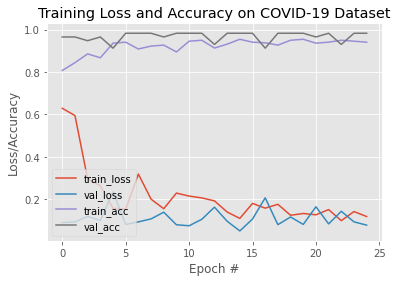

In [119]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [120]:
#from IPython.display import Image
#Image('/content/drive/My Drive/covid dataset/images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg')
image = cv2.imread('/content/drive/My Drive/covid dataset/images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
img=np.reshape(image,(1,224,224,3))
model.predict(img)

array([[1., 0.]], dtype=float32)

END OF INCEPTION V3 MODEL

RESNET50

In [0]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [126]:
res = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
outputs = res.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.5)(outputs)
outputs = Dense(2, activation="softmax")(outputs)
model = Model(inputs=res.input, outputs=outputs)
for layer in res.layers:
  layer.trainable = False


94773248/94765736 [==============================] - 0s 0us/step


In [0]:
model_chkpt = ModelCheckpoint('best_mod.h5', save_best_only=True, monitor='accuracy')
early_stopping = EarlyStopping(monitor='loss', restore_best_weights=False, patience=10)

In [128]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])
# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS,callbacks=[early_stopping,model_chkpt])

[INFO] compiling model...
[INFO] training head...
Epoch 1/25
28/28 [==============================] - 44s 2s/step - loss: 1.0660 - accuracy: 0.6239 - val_loss: 0.5266 - val_accuracy: 0.7018
Epoch 2/25
28/28 [==============================] - 43s 2s/step - loss: 0.5776 - accuracy: 0.8073 - val_loss: 0.5395 - val_accuracy: 0.7368
Epoch 3/25
28/28 [==============================] - 42s 2s/step - loss: 0.7102 - accuracy: 0.7523 - val_loss: 0.9059 - val_accuracy: 0.6316
Epoch 4/25
28/28 [==============================] - 42s 2s/step - loss: 0.6985 - accuracy: 0.7661 - val_loss: 0.4169 - val_accuracy: 0.8772
Epoch 5/25
28/28 [==============================] - 45s 2s/step - loss: 1.4065 - accuracy: 0.7018 - val_loss: 0.8026 - val_accuracy: 0.7719
Epoch 6/25
28/28 [==============================] - 43s 2s/step - loss: 0.8578 - accuracy: 0.8165 - val_loss: 1.0314 - val_accuracy: 0.7193
Epoch 7/25
28/28 [==============================] - 43s 2s/step - loss: 0.8370 - accuracy: 0.8119 - val_loss: 

In [129]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    infected       0.87      0.87      0.87        23
      normal       0.91      0.91      0.91        34

    accuracy                           0.89        57
   macro avg       0.89      0.89      0.89        57
weighted avg       0.89      0.89      0.89        57



In [130]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[20  3]
 [ 3 31]]
acc: 0.8947
sensitivity: 0.8696
specificity: 0.9118


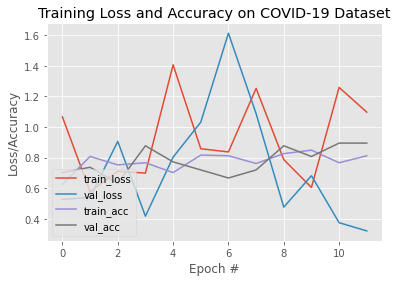

In [133]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 12), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 12), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 12), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 12), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(args["plot"])

In [134]:
#from IPython.display import Image
#Image('/content/drive/My Drive/covid dataset/images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg')
image = cv2.imread('/content/drive/My Drive/covid dataset/images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
img=np.reshape(image,(1,224,224,3))
model.predict(img)

array([[1.0000000e+00, 1.8941121e-11]], dtype=float32)